# Gemini GMOS Photometry reduction using DRAGONS Python API
***
## Public archival data from program GS2018A-Q-207 - NGC5018
#### adapted from https://gmosimg-drtutorial.readthedocs.io/en/v2.1.1/03_api_reduction.html
#### don't forget to `conda install -n dragons nb_conda_kernels ipykernel` to run this notebook on the DRAGONS env
***

**Importing Python Libraries** (you'll probably have to install the `wget` and `ipympl` libraries)

In [1]:
from __future__ import print_function

import glob
import wget

from gempy.adlibrary import dataselect
from recipe_system import cal_service
from recipe_system.reduction.coreReduce import Reduce
from gempy.utils import logutils

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import LogNorm
from matplotlib.colors import PowerNorm

#%matplotlib widget
%matplotlib inline

**Downloading the data**

In [9]:
# Science data from GS2018A-Q-207
wget.download("http://archive.gemini.edu/file/S20180419S0098.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0099.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0100.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0101.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0102.fits")
# Twilight flats 
wget.download("http://archive.gemini.edu/file/S20180419S0207.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0208.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0209.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0210.fits")
wget.download("http://archive.gemini.edu/file/S20180419S0211.fits")
# Biases 
wget.download("http://archive.gemini.edu/file/S20180423S0050.fits")
wget.download("http://archive.gemini.edu/file/S20180423S0051.fits")
wget.download("http://archive.gemini.edu/file/S20180423S0052.fits")
wget.download("http://archive.gemini.edu/file/S20180423S0053.fits")
wget.download("http://archive.gemini.edu/file/S20180423S0054.fits")

'S20180423S0054.fits'

**Create and move data to raw/ directory**

In [10]:
!mkdir raw/
!mv S2018*.fits raw/

**Setting up the DRAGONS logger**

In [2]:
logutils.config(file_name='gmos_data_reduction.log')

**Setting up the Calibration Service**

First, check that you have already a `rsys.cfg` file inside the `~/.geminidr/`. It should contain:

```[calibs]
standalone = True
database_dir = /path_to_this_folder/```

In [3]:
caldb = cal_service.CalibrationService()
caldb.config()
caldb.init()

cal_service.set_calservice()

CalibrationService is configured as standalone.
The configured local database will be used.


**Create a list of all the FITS files in the directory**

In [7]:
all_files = glob.glob('raw/S2018*[0-9].fits')
all_files.sort()
#all_files

**List of Biases, Flats, and Science frames**

In [6]:
list_biases  = dataselect.select_data(all_files,['BIAS'],[])
list_flats   = dataselect.select_data(all_files,['FLAT'],[],
                                      dataselect.expr_parser('filter_name=="g"'))
list_science = dataselect.select_data(all_files,[],['CAL'],
                                      dataselect.expr_parser('(observation_class=="science" and filter_name=="g")'))

**Make master Bias/Flat and add to the calibration database**

In [25]:
reduce_bias = Reduce()
reduce_bias.files.extend(list_biases)
reduce_bias.runr()

reduce_flats = Reduce()
reduce_flats.files.extend(list_flats)
reduce_flats.runr()

caldb.add_cal(reduce_bias.output_filenames[0])
caldb.add_cal(reduce_flats.output_filenames[0])

All submitted files appear valid:
raw/S20180423S0050.fits ... raw/S20180423S0054.fits, 5 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to GMOS
         Updating keywords that are s

**Reduce Science Images**

In [28]:
reduce_science = Reduce()
reduce_science.files.extend(list_science)
reduce_science.runr()

All submitted files appear valid:
raw/S20180419S0098.fits ... raw/S20180419S0102.fits, 5 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to GMOS
         Updating keywords that are s

   y_offset: 0.09763060288719316
   
   S20180419S0099_sourcesDetected.fits: Using source correlation for alignment
   Refined transformation
   x_offset: -0.03882320428985302
   y_offset: 0.09800812183152957
   
   Cross-correlating sources in S20180419S0098_sourcesDetected.fits, S20180419S0100_sourcesDetected.fits
   Coarse model in 0.15 seconds
   x_offset: -1.25
   y_offset: -1.25
   
   Final model in 0.52 seconds
   x_offset: 0.1844274654831679
   y_offset: -0.8530471203457637
   
   S20180419S0100_sourcesDetected.fits: Using source correlation for alignment
   Refined transformation
   x_offset: 0.18457842582189266
   y_offset: -0.853254790405841
   
   Cross-correlating sources in S20180419S0098_sourcesDetected.fits, S20180419S0101_sourcesDetected.fits
   Coarse model in 0.15 seconds
   x_offset: -1.25
   y_offset: -1.25
   
   Final model in 0.52 seconds
   x_offset: 0.45584819177383906
   y_offset: -1.0692492754287741
   
   S20180419S0101_sourcesDetected.fits: Using source c

**Display the Stacked Image**

In [10]:
image_file = "S20180419S0098_stack.fits"
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: S20180419S0098_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     252   ()      
  1  SCI           1 ImageHDU       162   (3246, 2182)   float32   
  2  VAR           1 ImageHDU       162   (3246, 2182)   float32   
  3  DQ            1 ImageHDU       162   (3246, 2182)   int16 (rescales to uint16)   


In [11]:
image_data = fits.getdata(image_file, ext=1)
print(image_data.shape)

(2182, 3246)


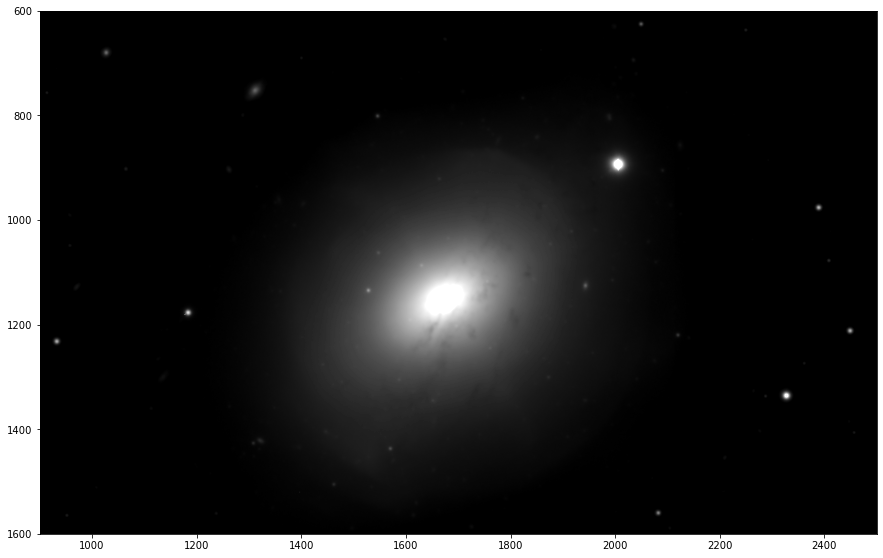

In [15]:
plt.figure(figsize = (15,15))
plt.imshow(image_data,cmap='gray',norm=LogNorm(vmin=3000, vmax=60000))
plt.xlim(900,2500)
plt.ylim(1600,600)
plt.show()

**Optional: remove duplicate calibrations and remove raw data (uncomment lines before running)**

In [79]:
#!rm -rf *_bias.fits *_flat.fits
#!rm -rf raw/